### EVODEX Mass Spectrometry Demonstration

This notebook demonstrates the use of the EVODEX mass spectrometry package, a tool designed for predicting the masses of potential products based on the molecular mass differences defined in EVODEX-M. This is useful in mass spectrometry analysis where the mass of a substrate can be used to predict the masses of possible products, aiding in the identification and validation of compounds in experimental data.

The EVODEX mass spectrometry package leverages a subset of EVODEX-M operators specifically tailored for mass spectrometry applications. By adding the mass differences defined in these operators to the mass of a given substrate, we can predict the masses of potential products.

In this demonstration, we consider a hypothetical use case where we are engineering a yeast strain to produce cortisol. Using standards, we have confirmed that cortisol shows up as an [M+H]+ ion at 363.2 Da. Comparing the spectra for wild-type and engineered cells, we observe several additional peaks only present in the engineered cells, including one at 377.2 Da. Assuming it is some enzymatic product of cortisol and assuming the new peak is an [M+H]+ peak as well, with our instrument having a precision of 0.01 Da, we aim to:

1. Find the EVODEX-M that corresponds to the mass difference.
2. Determine what reaction operators could explain the mass difference.
3. Project all the EVODEX-E operators consistent with this EVODEX-M onto cortisol and predict what product could be produced
## Installation and Imports

In [1]:
# Installation of the EVODEX library and import of evaluation methods
!pip install evodex -q
from evodex.mass_spec import calculate_mass, find_evodex_m, get_reaction_operators, predict_products

# Additional imports used in this notebook
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import rdMolDraw2D


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 26.7 MB/s eta 0:00:00


## Cortisol [M+H]+ ion mass

In [2]:
cortisol_M_plus_H = "O=C4\C=C2/[C@]([C@H]1[C@@H](O)C[C@@]3([C@@](O)(C(=O)CO)CC[C@H]3[C@@H]1CC2)C)(C)CC4.[H+]"
mass = calculate_mass(cortisol_M_plus_H)
mass

[19:49:09] WARNING: not removing hydrogen atom without neighbors


363.21660051209005

## Identifying EVODEX-M Entries for Observed Mass Differences

In [3]:
# An MS peak was originally identified
substrate_mass = 363.2166

# A new peak is observed at 166 Da which may be an enzymatic product
potential_product_mass = 377.2323

mass_diff = potential_product_mass - substrate_mass
mass_diff

14.015699999999981

In [4]:
# Assume a Dual Electrospray Time-of-Flight Liquid Chromatography-Mass Spectrometer
precision = 0.01 #for TOF
# precision = 0.001 #for orbitrap
precision

0.01

In [5]:
# Find matching EVODEX-M entries for the mass difference
matching_evodex_m = find_evodex_m(mass_diff, precision)
matching_evodex_m

[{'id': 'EVODEX.0-M569', 'mass': 14.01566}]

The algorithm correctly finds an EVODEX-M associated with methylation thus confirming that the peak could be the result of an enzymatic reaction.  The relationship could have been excluded if the algorithm returned an empty array.

## Predicting reactions

In [6]:
# Get reaction operators that could explain the mass difference
matching_operators = get_reaction_operators(mass_diff, precision)
matching_operators


({'E': [{'id': 'EVODEX.0-E349',
    'smirks': '[H][N:28]([C:29])[H:61]>>[H]C([H])([H])[N:28]([C:29])[H:61]'},
   {'id': 'EVODEX.0-E652',
    'smirks': '[H]OC(=O)[C@@]([H])(C([H])([H])[H])[O:3][C:4].O=[O:25]>>[H]OC(=O)C([H])([H])C([H])([H])C(=O)[O:25][H].[H][O:3][C:4]'},
   {'id': 'EVODEX.0-E746',
    'smirks': '[H][O:28][C:29]>>[H]C([H])([H])[O:28][C:29]'},
   {'id': 'EVODEX.0-E874',
    'smirks': '[H][N:2]([C:1])[C:3]>>[H]C([H])([H])[N:2]([C:1])[C:3]'},
   {'id': 'EVODEX.0-E877',
    'smirks': '[H][S:12][C:11]>>[H]C([H])([H])[S:12][C:11]'},
   {'id': 'EVODEX.0-E871',
    'smirks': '[#6:32]:[#7:33]:[#6:34]>>[#85]-[#6](-[#85])(-[#85])-[#7&+:33](:[#6:32]):[#6:34]'},
   {'id': 'EVODEX.0-E888',
    'smirks': '[H][Se:31][C:30]>>[H]C([H])([H])[Se:31][C:30]'},
   {'id': 'EVODEX.0-E900',
    'smirks': '[H][C:3](:[C:2]):[C:4]>>[H]C([H])([H])[C:3](:[C:2]):[C:4]'},
   {'id': 'EVODEX.0-E903',
    'smirks': '[H][C:32](:[C:31]):[N:33]>>[H]C([H])([H])[C:32](:[C:31]):[N:33]'},
   {'id': 'EVODEX.0-E906

Many reactions correspond to this mass difference, some or none of which may actually be viable candidates.  At this stage, no structure has been presented upon which to make a more specific prediction.

## Predicting product structure

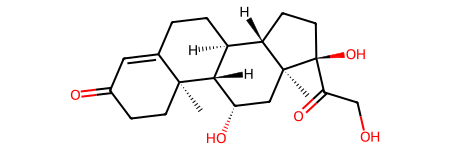

In [7]:
cortisol = "O=C4\C=C2/[C@]([C@H]1[C@@H](O)C[C@@]3([C@@](O)(C(=O)CO)CC[C@H]3[C@@H]1CC2)C)(C)CC4"
mol = Chem.MolFromSmiles(cortisol)
mol

In [8]:

# Project EVODEX-E operators onto each substrate and predict products
predicted_products = predict_products(cortisol, mass_diff, precision)
predicted_products

EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:18] product 0 has no mapped atoms.
[19:49:18] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:18] product 0 has no mapped atoms.
[19:49:19] product 0 has no mapped atoms.
[19:49:19] product 0 has no mapped atoms.
[19:49:19] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:19] product 0 has no mapped atoms.
[19:49:19] product 0 has no mapped atoms.
[19:49:19] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:19] product 0 has no mapped atoms.
[19:49:19] product 0 has no mapped atoms.
[19:49:19] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:20] product 0 has no mapped atoms.
[19:49:20] product 0 has no mapped atoms.
[19:49:20] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:20] product 0 has no mapped atoms.
[19:49:20] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:20] product 0 has no mapped atoms.
[19:49:20] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:20] product 0 has no mapped atoms.
[19:49:20] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:21] product 0 has no mapped atoms.
[19:49:21] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:21] product 0 has no mapped atoms.
[19:49:21] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:21] product 0 has no mapped atoms.
[19:49:21] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:21] product 0 has no mapped atoms.
[19:49:21] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:21] product 0 has no mapped atoms.
[19:49:22] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:22] product 0 has no mapped atoms.
[19:49:22] product 0 has no mapped atoms.
[19:49:22] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:22] product 0 has no mapped atoms.
[19:49:22] product 0 has no mapped atoms.
[19:49:22] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:22] product 0 has no mapped atoms.
[19:49:22] product 0 has no mapped atoms.
[19:49:23] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:23] product 0 has no mapped atoms.
[19:49:23] product 0 has no mapped atoms.
[19:49:23] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:23] product 0 has no mapped atoms.
[19:49:23] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:23] product 0 has no mapped atoms.
[19:49:23] product 0 has no mapped atoms.
[19:49:23] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:23] product 0 has no mapped atoms.
[19:49:23] product 0 has no mapped atoms.
[19:49:24] product 0 has no mapped atoms.
[19:49:24] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:24] product 0 has no mapped atoms.
[19:49:24] product 0 has no mapped atoms.
[19:49:24] product 0 has no mapped atoms.
[19:49:24] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:24] product 0 has no mapped atoms.
[19:49:24] product 0 has no mapped atoms.
[19:49:24] product 0 has no mapped atoms.
[19:49:24] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:24] product 0 has no mapped atoms.
[19:49:24] product 0 has no mapped atoms.
[19:49:24] product 0 has no mapped atoms.
[19:49:24] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:24] product 0 has no mapped atoms.
[19:49:24] product 0 has no mapped atoms.
[19:49:25] product 0 has no mapped atoms.
[19:49:25] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:25] product 0 has no mapped atoms.
[19:49:25] product 0 has no mapped atoms.
[19:49:25] product 0 has no mapped atoms.
[19:49:25] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:25] product 0 has no mapped atoms.
[19:49:25] product 0 has no mapped atoms.
[19:49:25] product 0 has no mapped atoms.
[19:49:25] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:25] product 0 has no mapped atoms.
[19:49:25] product 0 has no mapped atoms.
[19:49:25] product 0 has no mapped atoms.
[19:49:25] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:25] product 0 has no mapped atoms.
[19:49:25] product 0 has no mapped atoms.
[19:49:26] product 0 has no mapped atoms.
[19:49:26] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:26] product 0 has no mapped atoms.
[19:49:26] product 0 has no mapped atoms.
[19:49:26] product 0 has no mapped atoms.
[19:49:26] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:26] product 0 has no mapped atoms.
[19:49:26] product 0 has no mapped atoms.
[19:49:26] product 0 has no mapped atoms.
[19:49:26] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:26] product 0 has no mapped atoms.
[19:49:26] product 0 has no mapped atoms.
[19:49:26] product 0 has no mapped atoms.
[19:49:26] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:26] product 0 has no mapped atoms.
[19:49:26] product 0 has no mapped atoms.
[19:49:27] product 0 has no mapped atoms.
[19:49:27] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:27] product 0 has no mapped atoms.
[19:49:27] product 0 has no mapped atoms.
[19:49:27] product 0 has no mapped atoms.
[19:49:27] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:27] product 0 has no mapped atoms.
[19:49:27] product 0 has no mapped atoms.
[19:49:27] product 0 has no mapped atoms.
[19:49:27] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:27] product 0 has no mapped atoms.
[19:49:27] product 0 has no mapped atoms.
[19:49:27] product 0 has no mapped atoms.
[19:49:27] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:27] product 0 has no mapped atoms.
[19:49:27] product 0 has no mapped atoms.
[19:49:27] product 0 has no mapped atoms.
[19:49:28] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:28] product 0 has no mapped atoms.
[19:49:28] product 0 has no mapped atoms.
[19:49:28] product 0 has no mapped atoms.
[19:49:28] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:28] product 0 has no mapped atoms.
[19:49:28] product 0 has no mapped atoms.
[19:49:28] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:28] product 0 has no mapped atoms.
[19:49:28] product 0 has no mapped atoms.
[19:49:28] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:28] product 0 has no mapped atoms.
[19:49:29] product 0 has no mapped atoms.
[19:49:29] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:29] product 0 has no mapped atoms.
[19:49:29] product 0 has no mapped atoms.
[19:49:29] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:29] product 0 has no mapped atoms.
[19:49:29] product 0 has no mapped atoms.
[19:49:29] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:29] product 0 has no mapped atoms.
[19:49:29] product 0 has no mapped atoms.
[19:49:30] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:30] product 0 has no mapped atoms.
[19:49:30] product 0 has no mapped atoms.
[19:49:30] product 0 has no mapped atoms.
[19:49:30] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:30] product 0 has no mapped atoms.
[19:49:30] product 0 has no mapped atoms.
[19:49:30] product 0 has no mapped atoms.
[19:49:30] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:30] product 0 has no mapped atoms.
[19:49:30] product 0 has no mapped atoms.
[19:49:30] product 0 has no mapped atoms.
[19:49:30] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:30] product 0 has no mapped atoms.
[19:49:30] product 0 has no mapped atoms.
[19:49:30] product 0 has no mapped atoms.
[19:49:30] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:31] product 0 has no mapped atoms.
[19:49:31] product 0 has no mapped atoms.
[19:49:31] product 0 has no mapped atoms.
[19:49:31] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:31] product 0 has no mapped atoms.
[19:49:31] product 0 has no mapped atoms.
[19:49:31] product 0 has no mapped atoms.
[19:49:31] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:31] product 0 has no mapped atoms.
[19:49:31] product 0 has no mapped atoms.
[19:49:31] product 0 has no mapped atoms.
[19:49:31] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:31] product 0 has no mapped atoms.
[19:49:31] product 0 has no mapped atoms.
[19:49:31] product 0 has no mapped atoms.
[19:49:31] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:32] product 0 has no mapped atoms.
[19:49:32] product 0 has no mapped atoms.
[19:49:32] product 0 has no mapped atoms.
[19:49:32] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:32] product 0 has no mapped atoms.
[19:49:32] product 0 has no mapped atoms.
[19:49:32] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:32] product 0 has no mapped atoms.
[19:49:32] product 0 has no mapped atoms.
[19:49:32] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:32] product 0 has no mapped atoms.
[19:49:32] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:33] product 0 has no mapped atoms.
[19:49:33] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:33] product 0 has no mapped atoms.
[19:49:33] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:33] product 0 has no mapped atoms.
[19:49:33] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:33] product 0 has no mapped atoms.
[19:49:33] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:34] product 0 has no mapped atoms.
[19:49:34] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:34] product 0 has no mapped atoms.
[19:49:34] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:34] product 0 has no mapped atoms.
[19:49:34] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:34] product 0 has no mapped atoms.
[19:49:34] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:34] product 0 has no mapped atoms.
[19:49:35] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:35] product 0 has no mapped atoms.
[19:49:35] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:35] product 0 has no mapped atoms.
[19:49:35] product 0 has no mapped atoms.
[19:49:35] product 0 has no mapped atoms.
[19:49:35] product 0 has no mapped atoms.
[19:49:35] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:35] product 0 has no mapped atoms.
[19:49:35] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:36] product 0 has no mapped atoms.
[19:49:36] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:36] product 0 has no mapped atoms.
[19:49:36] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:36] product 0 has no mapped atoms.
[19:49:36] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:36] product 0 has no mapped atoms.
[19:49:36] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:37] product 0 has no mapped atoms.
[19:49:37] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:37] product 0 has no mapped atoms.
[19:49:37] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:37] product 0 has no mapped atoms.
[19:49:37] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:37] product 0 has no mapped atoms.
[19:49:37] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:38] product 0 has no mapped atoms.
[19:49:38] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:38] product 0 has no mapped atoms.
[19:49:38] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:38] product 0 has no mapped atoms.
[19:49:38] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:38] product 0 has no mapped atoms.
[19:49:38] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:39] product 0 has no mapped atoms.
[19:49:39] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:39] product 0 has no mapped atoms.
[19:49:39] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:39] product 0 has no mapped atoms.
[19:49:39] product 0 has no mapped atoms.
[19:49:39] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:39] product 0 has no mapped atoms.
[19:49:39] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:40] product 0 has no mapped atoms.
[19:49:40] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:40] product 0 has no mapped atoms.
[19:49:40] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:40] product 0 has no mapped atoms.
[19:49:40] product 0 has no mapped atoms.
[19:49:40] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:40] product 0 has no mapped atoms.
[19:49:40] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:41] product 0 has no mapped atoms.
[19:49:41] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:41] product 0 has no mapped atoms.
[19:49:41] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:41] product 0 has no mapped atoms.
[19:49:41] product 0 has no mapped atoms.
[19:49:41] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:41] product 0 has no mapped atoms.
[19:49:41] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:41] product 0 has no mapped atoms.
[19:49:42] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:42] product 0 has no mapped atoms.
[19:49:42] product 0 has no mapped atoms.
[19:49:42] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:42] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:42] product 0 has no mapped atoms.
[19:49:42] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:42] product 0 has no mapped atoms.
[19:49:42] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:43] product 0 has no mapped atoms.
[19:49:43] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:43] product 0 has no mapped atoms.
[19:49:43] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:43] product 0 has no mapped atoms.
[19:49:43] product 0 has no mapped atoms.
[19:49:43] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:43] product 0 has no mapped atoms.
[19:49:43] product 0 has no mapped atoms.
[19:49:43] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:44] product 0 has no mapped atoms.
[19:49:44] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:44] product 0 has no mapped atoms.
[19:49:44] product 0 has no mapped atoms.
[19:49:44] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:44] product 0 has no mapped atoms.
[19:49:44] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:44] product 0 has no mapped atoms.
[19:49:44] product 0 has no mapped atoms.
[19:49:44] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:45] product 0 has no mapped atoms.
[19:49:45] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:45] product 0 has no mapped atoms.
[19:49:45] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:45] product 0 has no mapped atoms.
[19:49:45] product 0 has no mapped atoms.
[19:49:45] product 0 has no mapped atoms.
[19:49:45] product 0 has no mapped atoms.
[19:49:45] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:45] product 0 has no mapped atoms.
[19:49:46] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:46] product 0 has no mapped atoms.
[19:49:46] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:46] product 0 has no mapped atoms.
[19:49:46] product 0 has no mapped atoms.
[19:49:46] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:46] product 0 has no mapped atoms.
[19:49:46] product 0 has no mapped atoms.
[19:49:46] product 0 has no mapped atoms.
[19:49:46] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:46] product 0 has no mapped atoms.
[19:49:47] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:47] product 0 has no mapped atoms.
[19:49:47] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:47] product 0 has no mapped atoms.
[19:49:47] product 0 has no mapped atoms.
[19:49:47] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:47] product 0 has no mapped atoms.
[19:49:47] product 0 has no mapped atoms.
[19:49:47] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:47] product 0 has no mapped atoms.
[19:49:48] product 0 has no mapped atoms.
[19:49:48] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:48] product 0 has no mapped atoms.
[19:49:48] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:48] product 0 has no mapped atoms.
[19:49:48] product 0 has no mapped atoms.
[19:49:48] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:48] product 0 has no mapped atoms.
[19:49:48] product 0 has no mapped atoms.
[19:49:48] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:49] product 0 has no mapped atoms.
[19:49:49] product 0 has no mapped atoms.
[19:49:49] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:49] product 0 has no mapped atoms.
[19:49:49] product 0 has no mapped atoms.
[19:49:49] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:49] product 0 has no mapped atoms.
[19:49:49] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:49] product 0 has no mapped atoms.
[19:49:50] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:50] product 0 has no mapped atoms.
[19:49:50] product 0 has no mapped atoms.
[19:49:50] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:50] product 0 has no mapped atoms.
[19:49:50] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:50] product 0 has no mapped atoms.
[19:49:50] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:50] product 0 has no mapped atoms.
[19:49:51] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:51] product 0 has no mapped atoms.
[19:49:51] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:51] product 0 has no mapped atoms.
[19:49:51] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:51] product 0 has no mapped atoms.
[19:49:51] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:51] product 0 has no mapped atoms.
[19:49:51] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:52] product 0 has no mapped atoms.
[19:49:52] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:52] product 0 has no mapped atoms.
[19:49:52] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:52] product 0 has no mapped atoms.
[19:49:52] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:52] product 0 has no mapped atoms.
[19:49:52] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:53] product 0 has no mapped atoms.
[19:49:53] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:53] product 0 has no mapped atoms.
[19:49:53] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:53] product 0 has no mapped atoms.
[19:49:53] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:53] product 0 has no mapped atoms.
[19:49:53] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:54] product 0 has no mapped atoms.
[19:49:54] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:54] product 0 has no mapped atoms.
[19:49:54] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:54] product 0 has no mapped atoms.
[19:49:54] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:54] product 0 has no mapped atoms.
[19:49:54] product 0 has no mapped atoms.
[19:49:55] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:55] product 0 has no mapped atoms.
[19:49:55] product 0 has no mapped atoms.
[19:49:55] product 0 has no mapped atoms.
[19:49:55] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:55] product 0 has no mapped atoms.
[19:49:55] product 0 has no mapped atoms.
[19:49:55] product 0 has no mapped atoms.
[19:49:55] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:55] product 0 has no mapped atoms.
[19:49:55] product 0 has no mapped atoms.
[19:49:55] product 0 has no mapped atoms.
[19:49:55] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:55] product 0 has no mapped atoms.
[19:49:55] product 0 has no mapped atoms.
[19:49:56] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:56] product 0 has no mapped atoms.
[19:49:56] product 0 has no mapped atoms.
[19:49:56] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:56] product 0 has no mapped atoms.
[19:49:56] product 0 has no mapped atoms.
[19:49:56] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:56] product 0 has no mapped atoms.
[19:49:56] product 0 has no mapped atoms.
[19:49:56] product 0 has no mapped atoms.


EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-E652 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.


[19:49:56] product 0 has no mapped atoms.
[19:49:56] product 0 has no mapped atoms.


{'[1CH3]O[1CH]1[1CH2][1C]2([1CH3])[1CH]([1CH2][1CH2][1C]2(O)C(O)[1CH2]O)[1CH]2[1CH2][1CH2]C3CC(O)[1CH2][1CH2][1C]3([1CH3])[1CH]12': {'smiles': '[H]OC([H])([H])C(=O)[C@@]1(O[H])C([H])([H])C([H])([H])[C@@]2([H])[C@]3([H])C([H])([H])C([H])([H])C4=C([H])C(=O)C([H])([H])C([H])([H])[C@]4(C([H])([H])[H])[C@@]3([H])[C@@]([H])(OC([H])([H])[H])C([H])([H])[C@@]21C([H])([H])[H]',
  'projections': {(('EVODEX.0-F569',), 'EVODEX.0-M569'): ['EVODEX.0-E746']}},
 '[1CH3]O[1C]1(C(O)[1CH2]O)[1CH2][1CH2][1CH]2[1CH]3[1CH2][1CH2]C4CC(O)[1CH2][1CH2][1C]4([1CH3])[1CH]3[1CH](O)[1CH2][1C]21[1CH3]': {'smiles': '[H]OC([H])([H])C(=O)[C@@]1(OC([H])([H])[H])C([H])([H])C([H])([H])[C@@]2([H])[C@]3([H])C([H])([H])C([H])([H])C4=C([H])C(=O)C([H])([H])C([H])([H])[C@]4(C([H])([H])[H])[C@@]3([H])[C@@]([H])(O[H])C([H])([H])[C@@]21C([H])([H])[H]',
  'projections': {(('EVODEX.0-F569',), 'EVODEX.0-M569'): ['EVODEX.0-E746']}},
 '[1CH3]O[1CH2]C(O)[1C]1(O)[1CH2][1CH2][1CH]2[1CH]3[1CH2][1CH2]C4CC(O)[1CH2][1CH2][1C]4([1CH3])[1CH]3[1C

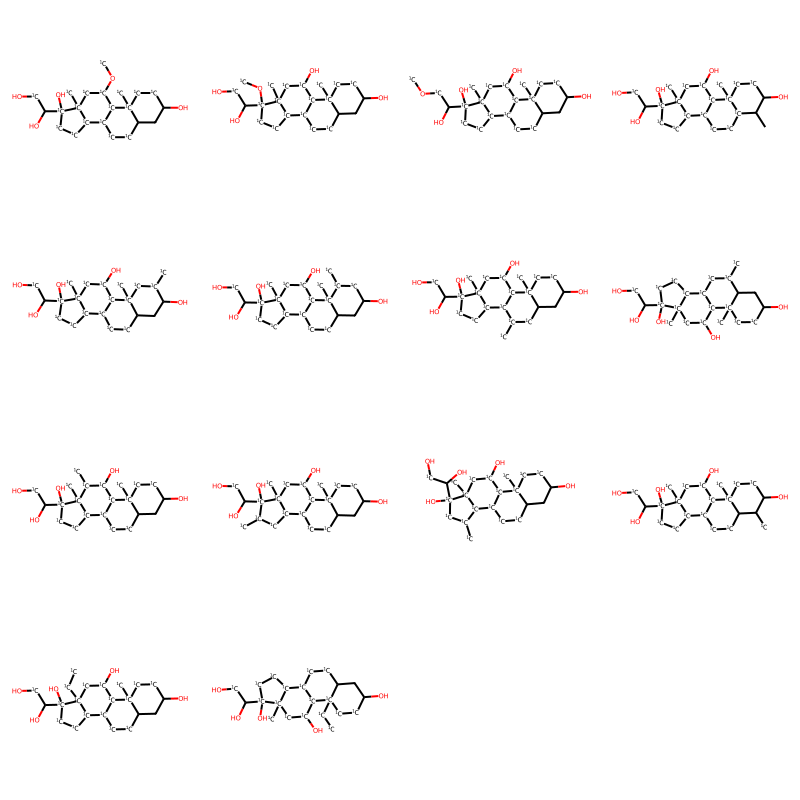

In [9]:
# Render the molecules with hydrogens
def draw_molecules(smiles_list):
    mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
    for mol in mols:
        AllChem.Compute2DCoords(mol)
        mol = Chem.AddHs(mol)
    img = Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(200, 200))
    return img

# Prepare the lists for drawing
smiles_list = list(predicted_products.keys())

# Draw the molecules
img = draw_molecules(smiles_list)
img

In [10]:
# Project the more abstract EVODEX-C operators onto each substrate and predict products
predicted_products2 = predict_products(cortisol, mass_diff, precision, 'C')
predicted_products2

EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: C

[19:49:57] product 1 has no mapped atoms.
[19:49:57] product 0 has no mapped atoms.
[19:49:57] product 1 has no mapped atoms.
[19:49:57] product 0 has no mapped atoms.
[19:49:57] product 1 has no mapped atoms.
[19:49:57] product 0 has no mapped atoms.
[19:49:57] product 1 has no mapped atoms.
[19:49:57] product 0 has no mapped atoms.
[19:49:57] product 1 has no mapped atoms.
[19:49:57] product 0 has no mapped atoms.
[19:49:57] product 1 has no mapped atoms.
[19:49:57] product 0 has no mapped atoms.
[19:49:57] product 1 has no mapped atoms.


EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: C

[19:49:57] product 0 has no mapped atoms.
[19:49:57] product 1 has no mapped atoms.
[19:49:57] product 0 has no mapped atoms.
[19:49:57] product 1 has no mapped atoms.
[19:49:57] product 0 has no mapped atoms.
[19:49:57] product 1 has no mapped atoms.
[19:49:57] product 0 has no mapped atoms.
[19:49:57] product 1 has no mapped atoms.
[19:49:57] product 0 has no mapped atoms.
[19:49:57] product 1 has no mapped atoms.
[19:49:57] product 0 has no mapped atoms.
[19:49:57] product 1 has no mapped atoms.
[19:49:57] product 0 has no mapped atoms.
[19:49:57] product 1 has no mapped atoms.
[19:49:57] product 0 has no mapped atoms.
[19:49:57] product 1 has no mapped atoms.
[19:49:57] product 0 has no mapped atoms.
[19:49:57] product 1 has no mapped atoms.
[19:49:57] product 0 has no mapped atoms.
[19:49:57] product 1 has no mapped atoms.
[19:49:57] product 0 has no mapped atoms.
[19:49:57] product 1 has no mapped atoms.
[19:49:57] product 0 has no mapped atoms.
[19:49:57] product 1 has no mapped

EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: C

[19:49:57] product 1 has no mapped atoms.
[19:49:57] product 0 has no mapped atoms.
[19:49:57] product 1 has no mapped atoms.
[19:49:57] product 0 has no mapped atoms.
[19:49:57] product 1 has no mapped atoms.
[19:49:57] product 0 has no mapped atoms.
[19:49:57] product 1 has no mapped atoms.
[19:49:57] product 0 has no mapped atoms.
[19:49:57] product 1 has no mapped atoms.
[19:49:57] product 0 has no mapped atoms.
[19:49:57] product 1 has no mapped atoms.
[19:49:57] product 0 has no mapped atoms.
[19:49:57] product 1 has no mapped atoms.


EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: C

[19:49:58] product 0 has no mapped atoms.
[19:49:58] product 1 has no mapped atoms.
[19:49:58] product 0 has no mapped atoms.
[19:49:58] product 1 has no mapped atoms.
[19:49:58] product 0 has no mapped atoms.
[19:49:58] product 1 has no mapped atoms.
[19:49:58] product 0 has no mapped atoms.
[19:49:58] product 1 has no mapped atoms.
[19:49:58] product 0 has no mapped atoms.
[19:49:58] product 1 has no mapped atoms.
[19:49:58] product 0 has no mapped atoms.
[19:49:58] product 1 has no mapped atoms.
[19:49:58] product 0 has no mapped atoms.


EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: C

[19:49:58] product 1 has no mapped atoms.
[19:49:58] product 0 has no mapped atoms.
[19:49:58] product 1 has no mapped atoms.
[19:49:58] product 0 has no mapped atoms.
[19:49:58] product 1 has no mapped atoms.
[19:49:58] product 0 has no mapped atoms.
[19:49:58] product 1 has no mapped atoms.
[19:49:58] product 0 has no mapped atoms.
[19:49:58] product 1 has no mapped atoms.
[19:49:58] product 0 has no mapped atoms.
[19:49:58] product 1 has no mapped atoms.
[19:49:58] product 0 has no mapped atoms.
[19:49:58] product 1 has no mapped atoms.
[19:49:58] product 0 has no mapped atoms.


EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: C

[19:49:58] product 1 has no mapped atoms.
[19:49:58] product 0 has no mapped atoms.
[19:49:58] product 1 has no mapped atoms.
[19:49:58] product 0 has no mapped atoms.
[19:49:58] product 1 has no mapped atoms.
[19:49:58] product 0 has no mapped atoms.
[19:49:58] product 1 has no mapped atoms.
[19:49:58] product 0 has no mapped atoms.
[19:49:58] product 1 has no mapped atoms.
[19:49:58] product 0 has no mapped atoms.
[19:49:58] product 1 has no mapped atoms.
[19:49:58] product 0 has no mapped atoms.
[19:49:58] product 1 has no mapped atoms.
[19:49:58] product 0 has no mapped atoms.


EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: C

[19:49:58] product 1 has no mapped atoms.
[19:49:58] product 0 has no mapped atoms.
[19:49:58] product 1 has no mapped atoms.
[19:49:58] product 0 has no mapped atoms.
[19:49:58] product 1 has no mapped atoms.
[19:49:58] product 0 has no mapped atoms.
[19:49:58] product 1 has no mapped atoms.
[19:49:58] product 0 has no mapped atoms.
[19:49:58] product 1 has no mapped atoms.
[19:49:58] product 0 has no mapped atoms.
[19:49:58] product 1 has no mapped atoms.
[19:49:58] product 0 has no mapped atoms.
[19:49:58] product 1 has no mapped atoms.
[19:49:58] product 0 has no mapped atoms.


EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: C

[19:49:58] product 1 has no mapped atoms.
[19:49:58] product 0 has no mapped atoms.
[19:49:58] product 1 has no mapped atoms.
[19:49:58] product 0 has no mapped atoms.
[19:49:58] product 1 has no mapped atoms.
[19:49:58] product 0 has no mapped atoms.
[19:49:58] product 1 has no mapped atoms.
[19:49:59] product 0 has no mapped atoms.
[19:49:59] product 1 has no mapped atoms.
[19:49:59] product 0 has no mapped atoms.
[19:49:59] product 1 has no mapped atoms.
[19:49:59] product 0 has no mapped atoms.
[19:49:59] product 1 has no mapped atoms.


EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: C

[19:49:59] product 0 has no mapped atoms.
[19:49:59] product 1 has no mapped atoms.
[19:49:59] product 0 has no mapped atoms.
[19:49:59] product 1 has no mapped atoms.
[19:49:59] product 0 has no mapped atoms.
[19:49:59] product 1 has no mapped atoms.
[19:49:59] product 0 has no mapped atoms.
[19:49:59] product 1 has no mapped atoms.
[19:49:59] product 0 has no mapped atoms.
[19:49:59] product 1 has no mapped atoms.
[19:49:59] product 0 has no mapped atoms.
[19:49:59] product 1 has no mapped atoms.
[19:49:59] product 0 has no mapped atoms.


EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: C

[19:49:59] product 1 has no mapped atoms.
[19:49:59] product 0 has no mapped atoms.
[19:49:59] product 1 has no mapped atoms.
[19:49:59] product 0 has no mapped atoms.
[19:49:59] product 1 has no mapped atoms.
[19:49:59] product 0 has no mapped atoms.
[19:49:59] product 1 has no mapped atoms.
[19:49:59] product 0 has no mapped atoms.
[19:49:59] product 1 has no mapped atoms.
[19:49:59] product 0 has no mapped atoms.
[19:49:59] product 1 has no mapped atoms.
[19:49:59] product 0 has no mapped atoms.
[19:49:59] product 1 has no mapped atoms.
[19:49:59] product 0 has no mapped atoms.


EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: C

[19:49:59] product 1 has no mapped atoms.
[19:49:59] product 0 has no mapped atoms.
[19:49:59] product 1 has no mapped atoms.
[19:49:59] product 0 has no mapped atoms.
[19:49:59] product 1 has no mapped atoms.
[19:49:59] product 0 has no mapped atoms.
[19:49:59] product 1 has no mapped atoms.
[19:49:59] product 0 has no mapped atoms.
[19:49:59] product 1 has no mapped atoms.
[19:49:59] product 0 has no mapped atoms.
[19:49:59] product 1 has no mapped atoms.
[19:49:59] product 0 has no mapped atoms.
[19:49:59] product 1 has no mapped atoms.
[19:49:59] product 0 has no mapped atoms.


EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: C

[19:49:59] product 1 has no mapped atoms.
[19:49:59] product 0 has no mapped atoms.
[19:49:59] product 1 has no mapped atoms.
[19:49:59] product 0 has no mapped atoms.
[19:49:59] product 1 has no mapped atoms.
[19:49:59] product 0 has no mapped atoms.
[19:49:59] product 1 has no mapped atoms.
[19:49:59] product 0 has no mapped atoms.
[19:49:59] product 1 has no mapped atoms.
[19:49:59] product 0 has no mapped atoms.
[19:49:59] product 1 has no mapped atoms.
[19:49:59] product 0 has no mapped atoms.
[19:49:59] product 1 has no mapped atoms.
[19:49:59] product 0 has no mapped atoms.


EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: C

[19:49:59] product 1 has no mapped atoms.
[19:49:59] product 0 has no mapped atoms.
[19:50:00] product 1 has no mapped atoms.
[19:50:00] product 0 has no mapped atoms.
[19:50:00] product 1 has no mapped atoms.
[19:50:00] product 0 has no mapped atoms.
[19:50:00] product 1 has no mapped atoms.
[19:50:00] product 0 has no mapped atoms.
[19:50:00] product 1 has no mapped atoms.
[19:50:00] product 0 has no mapped atoms.
[19:50:00] product 1 has no mapped atoms.
[19:50:00] product 0 has no mapped atoms.


EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: C

[19:50:00] product 1 has no mapped atoms.
[19:50:00] product 0 has no mapped atoms.
[19:50:00] product 1 has no mapped atoms.
[19:50:00] product 0 has no mapped atoms.
[19:50:00] product 1 has no mapped atoms.
[19:50:00] product 0 has no mapped atoms.
[19:50:00] product 1 has no mapped atoms.
[19:50:00] product 0 has no mapped atoms.
[19:50:00] product 1 has no mapped atoms.
[19:50:00] product 0 has no mapped atoms.
[19:50:00] product 1 has no mapped atoms.
[19:50:00] product 0 has no mapped atoms.
[19:50:00] product 1 has no mapped atoms.
[19:50:00] product 0 has no mapped atoms.


EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: C

[19:50:00] product 1 has no mapped atoms.
[19:50:00] product 0 has no mapped atoms.
[19:50:00] product 1 has no mapped atoms.
[19:50:00] product 0 has no mapped atoms.
[19:50:00] product 1 has no mapped atoms.
[19:50:00] product 0 has no mapped atoms.
[19:50:00] product 1 has no mapped atoms.
[19:50:00] product 0 has no mapped atoms.
[19:50:00] product 1 has no mapped atoms.
[19:50:00] product 0 has no mapped atoms.
[19:50:00] product 1 has no mapped atoms.
[19:50:00] product 0 has no mapped atoms.
[19:50:00] product 1 has no mapped atoms.


EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: C

[19:50:00] product 0 has no mapped atoms.
[19:50:00] product 1 has no mapped atoms.
[19:50:00] product 0 has no mapped atoms.
[19:50:00] product 1 has no mapped atoms.
[19:50:00] product 0 has no mapped atoms.
[19:50:00] product 1 has no mapped atoms.
[19:50:00] product 0 has no mapped atoms.
[19:50:00] product 1 has no mapped atoms.
[19:50:00] product 0 has no mapped atoms.
[19:50:00] product 1 has no mapped atoms.
[19:50:00] product 0 has no mapped atoms.
[19:50:00] product 1 has no mapped atoms.
[19:50:00] product 0 has no mapped atoms.


EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: C

[19:50:00] product 1 has no mapped atoms.
[19:50:00] product 0 has no mapped atoms.
[19:50:00] product 1 has no mapped atoms.
[19:50:00] product 0 has no mapped atoms.
[19:50:00] product 1 has no mapped atoms.
[19:50:00] product 0 has no mapped atoms.
[19:50:00] product 1 has no mapped atoms.
[19:50:00] product 0 has no mapped atoms.
[19:50:00] product 1 has no mapped atoms.
[19:50:00] product 0 has no mapped atoms.
[19:50:00] product 1 has no mapped atoms.
[19:50:00] product 0 has no mapped atoms.
[19:50:01] product 1 has no mapped atoms.


EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: C

[19:50:01] product 0 has no mapped atoms.
[19:50:01] product 1 has no mapped atoms.
[19:50:01] product 0 has no mapped atoms.
[19:50:01] product 1 has no mapped atoms.
[19:50:01] product 0 has no mapped atoms.
[19:50:01] product 1 has no mapped atoms.
[19:50:01] product 0 has no mapped atoms.
[19:50:01] product 1 has no mapped atoms.
[19:50:01] product 0 has no mapped atoms.
[19:50:01] product 1 has no mapped atoms.
[19:50:01] product 0 has no mapped atoms.
[19:50:01] product 1 has no mapped atoms.
[19:50:01] product 0 has no mapped atoms.


EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: C

[19:50:01] product 1 has no mapped atoms.
[19:50:01] product 0 has no mapped atoms.
[19:50:01] product 1 has no mapped atoms.
[19:50:01] product 0 has no mapped atoms.
[19:50:01] product 1 has no mapped atoms.
[19:50:01] product 0 has no mapped atoms.
[19:50:01] product 1 has no mapped atoms.
[19:50:01] product 0 has no mapped atoms.
[19:50:01] product 1 has no mapped atoms.
[19:50:01] product 0 has no mapped atoms.
[19:50:01] product 1 has no mapped atoms.
[19:50:01] product 0 has no mapped atoms.
[19:50:01] product 1 has no mapped atoms.


EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: C

[19:50:01] product 0 has no mapped atoms.
[19:50:01] product 1 has no mapped atoms.
[19:50:01] product 0 has no mapped atoms.
[19:50:01] product 1 has no mapped atoms.
[19:50:01] product 0 has no mapped atoms.
[19:50:01] product 1 has no mapped atoms.
[19:50:01] product 0 has no mapped atoms.
[19:50:01] product 1 has no mapped atoms.
[19:50:01] product 0 has no mapped atoms.
[19:50:01] product 1 has no mapped atoms.
[19:50:01] product 0 has no mapped atoms.
[19:50:01] product 1 has no mapped atoms.
[19:50:01] product 0 has no mapped atoms.


EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: C

[19:50:01] product 1 has no mapped atoms.
[19:50:01] product 0 has no mapped atoms.
[19:50:01] product 1 has no mapped atoms.
[19:50:01] product 0 has no mapped atoms.
[19:50:01] product 1 has no mapped atoms.
[19:50:01] product 0 has no mapped atoms.
[19:50:01] product 1 has no mapped atoms.
[19:50:01] product 0 has no mapped atoms.
[19:50:01] product 1 has no mapped atoms.
[19:50:01] product 0 has no mapped atoms.
[19:50:01] product 1 has no mapped atoms.
[19:50:01] product 0 has no mapped atoms.
[19:50:01] product 1 has no mapped atoms.
[19:50:01] product 0 has no mapped atoms.


EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: C

[19:50:01] product 1 has no mapped atoms.
[19:50:01] product 0 has no mapped atoms.
[19:50:01] product 1 has no mapped atoms.
[19:50:01] product 0 has no mapped atoms.
[19:50:01] product 1 has no mapped atoms.
[19:50:01] product 0 has no mapped atoms.
[19:50:01] product 1 has no mapped atoms.
[19:50:01] product 0 has no mapped atoms.
[19:50:02] product 1 has no mapped atoms.
[19:50:02] product 0 has no mapped atoms.
[19:50:02] product 1 has no mapped atoms.
[19:50:02] product 0 has no mapped atoms.
[19:50:02] product 1 has no mapped atoms.


EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: C

[19:50:02] product 0 has no mapped atoms.
[19:50:02] product 1 has no mapped atoms.
[19:50:02] product 0 has no mapped atoms.
[19:50:02] product 1 has no mapped atoms.
[19:50:02] product 0 has no mapped atoms.
[19:50:02] product 1 has no mapped atoms.
[19:50:02] product 0 has no mapped atoms.
[19:50:02] product 1 has no mapped atoms.
[19:50:02] product 0 has no mapped atoms.
[19:50:02] product 1 has no mapped atoms.
[19:50:02] product 0 has no mapped atoms.
[19:50:02] product 1 has no mapped atoms.
[19:50:02] product 0 has no mapped atoms.


EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: C

[19:50:02] product 1 has no mapped atoms.
[19:50:02] product 0 has no mapped atoms.
[19:50:02] product 1 has no mapped atoms.
[19:50:02] product 0 has no mapped atoms.
[19:50:02] product 1 has no mapped atoms.
[19:50:02] product 0 has no mapped atoms.
[19:50:02] product 1 has no mapped atoms.
[19:50:02] product 0 has no mapped atoms.
[19:50:02] product 1 has no mapped atoms.
[19:50:02] product 0 has no mapped atoms.
[19:50:02] product 1 has no mapped atoms.
[19:50:02] product 0 has no mapped atoms.
[19:50:02] product 1 has no mapped atoms.
[19:50:02] product 0 has no mapped atoms.


EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: C

[19:50:02] product 1 has no mapped atoms.
[19:50:02] product 0 has no mapped atoms.
[19:50:02] product 1 has no mapped atoms.
[19:50:02] product 0 has no mapped atoms.
[19:50:02] product 1 has no mapped atoms.
[19:50:02] product 0 has no mapped atoms.
[19:50:02] product 1 has no mapped atoms.
[19:50:02] product 0 has no mapped atoms.
[19:50:02] product 1 has no mapped atoms.
[19:50:02] product 0 has no mapped atoms.
[19:50:02] product 1 has no mapped atoms.
[19:50:02] product 0 has no mapped atoms.
[19:50:02] product 1 has no mapped atoms.
[19:50:02] product 0 has no mapped atoms.


EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: C

[19:50:02] product 1 has no mapped atoms.
[19:50:02] product 0 has no mapped atoms.
[19:50:02] product 1 has no mapped atoms.
[19:50:02] product 0 has no mapped atoms.
[19:50:02] product 1 has no mapped atoms.
[19:50:02] product 0 has no mapped atoms.
[19:50:02] product 1 has no mapped atoms.
[19:50:02] product 0 has no mapped atoms.
[19:50:02] product 1 has no mapped atoms.
[19:50:02] product 0 has no mapped atoms.
[19:50:02] product 1 has no mapped atoms.
[19:50:02] product 0 has no mapped atoms.
[19:50:02] product 1 has no mapped atoms.
[19:50:02] product 0 has no mapped atoms.


EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: C

[19:50:02] product 1 has no mapped atoms.
[19:50:02] product 0 has no mapped atoms.
[19:50:03] product 1 has no mapped atoms.
[19:50:03] product 0 has no mapped atoms.
[19:50:03] product 1 has no mapped atoms.
[19:50:03] product 0 has no mapped atoms.
[19:50:03] product 1 has no mapped atoms.
[19:50:03] product 0 has no mapped atoms.
[19:50:03] product 1 has no mapped atoms.
[19:50:03] product 0 has no mapped atoms.
[19:50:03] product 1 has no mapped atoms.
[19:50:03] product 0 has no mapped atoms.
[19:50:03] product 1 has no mapped atoms.


EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: C

[19:50:03] product 0 has no mapped atoms.
[19:50:03] product 1 has no mapped atoms.
[19:50:03] product 0 has no mapped atoms.
[19:50:03] product 1 has no mapped atoms.
[19:50:03] product 0 has no mapped atoms.
[19:50:03] product 1 has no mapped atoms.
[19:50:03] product 0 has no mapped atoms.
[19:50:03] product 1 has no mapped atoms.
[19:50:03] product 0 has no mapped atoms.
[19:50:03] product 1 has no mapped atoms.
[19:50:03] product 0 has no mapped atoms.
[19:50:03] product 1 has no mapped atoms.
[19:50:03] product 0 has no mapped atoms.


EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: C

[19:50:03] product 1 has no mapped atoms.
[19:50:03] product 0 has no mapped atoms.
[19:50:03] product 1 has no mapped atoms.
[19:50:03] product 0 has no mapped atoms.
[19:50:03] product 1 has no mapped atoms.
[19:50:03] product 0 has no mapped atoms.
[19:50:03] product 1 has no mapped atoms.
[19:50:03] product 0 has no mapped atoms.
[19:50:03] product 1 has no mapped atoms.
[19:50:03] product 0 has no mapped atoms.
[19:50:03] product 1 has no mapped atoms.
[19:50:03] product 0 has no mapped atoms.
[19:50:03] product 1 has no mapped atoms.
[19:50:03] product 0 has no mapped atoms.


EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: C

[19:50:03] product 1 has no mapped atoms.
[19:50:03] product 0 has no mapped atoms.
[19:50:03] product 1 has no mapped atoms.
[19:50:03] product 0 has no mapped atoms.
[19:50:03] product 1 has no mapped atoms.
[19:50:03] product 0 has no mapped atoms.
[19:50:03] product 1 has no mapped atoms.
[19:50:03] product 0 has no mapped atoms.
[19:50:03] product 1 has no mapped atoms.
[19:50:03] product 0 has no mapped atoms.
[19:50:03] product 1 has no mapped atoms.
[19:50:03] product 0 has no mapped atoms.
[19:50:03] product 1 has no mapped atoms.
[19:50:03] product 0 has no mapped atoms.


EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: C

[19:50:03] product 1 has no mapped atoms.
[19:50:03] product 0 has no mapped atoms.
[19:50:03] product 1 has no mapped atoms.
[19:50:03] product 0 has no mapped atoms.
[19:50:03] product 1 has no mapped atoms.
[19:50:03] product 0 has no mapped atoms.
[19:50:03] product 1 has no mapped atoms.
[19:50:03] product 0 has no mapped atoms.
[19:50:03] product 1 has no mapped atoms.
[19:50:03] product 0 has no mapped atoms.
[19:50:04] product 1 has no mapped atoms.
[19:50:04] product 0 has no mapped atoms.
[19:50:04] product 1 has no mapped atoms.


EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: C

[19:50:04] product 0 has no mapped atoms.
[19:50:04] product 1 has no mapped atoms.
[19:50:04] product 0 has no mapped atoms.
[19:50:04] product 1 has no mapped atoms.
[19:50:04] product 0 has no mapped atoms.
[19:50:04] product 1 has no mapped atoms.
[19:50:04] product 0 has no mapped atoms.
[19:50:04] product 1 has no mapped atoms.
[19:50:04] product 0 has no mapped atoms.
[19:50:04] product 1 has no mapped atoms.
[19:50:04] product 0 has no mapped atoms.
[19:50:04] product 1 has no mapped atoms.


EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: C

[19:50:04] product 0 has no mapped atoms.
[19:50:04] product 1 has no mapped atoms.
[19:50:04] product 0 has no mapped atoms.
[19:50:04] product 1 has no mapped atoms.
[19:50:04] product 0 has no mapped atoms.
[19:50:04] product 1 has no mapped atoms.
[19:50:04] product 0 has no mapped atoms.
[19:50:04] product 1 has no mapped atoms.
[19:50:04] product 0 has no mapped atoms.
[19:50:04] product 1 has no mapped atoms.
[19:50:04] product 0 has no mapped atoms.
[19:50:04] product 1 has no mapped atoms.
[19:50:04] product 0 has no mapped atoms.


EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: C

[19:50:04] product 1 has no mapped atoms.
[19:50:04] product 0 has no mapped atoms.
[19:50:04] product 1 has no mapped atoms.
[19:50:04] product 0 has no mapped atoms.
[19:50:04] product 1 has no mapped atoms.
[19:50:04] product 0 has no mapped atoms.
[19:50:04] product 1 has no mapped atoms.
[19:50:04] product 0 has no mapped atoms.
[19:50:04] product 1 has no mapped atoms.
[19:50:04] product 0 has no mapped atoms.
[19:50:04] product 1 has no mapped atoms.
[19:50:04] product 0 has no mapped atoms.
[19:50:04] product 1 has no mapped atoms.
[19:50:04] product 0 has no mapped atoms.
[19:50:04] product 1 has no mapped atoms.
[19:50:04] product 0 has no mapped atoms.


EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: C

[19:50:04] product 1 has no mapped atoms.
[19:50:04] product 0 has no mapped atoms.
[19:50:04] product 1 has no mapped atoms.
[19:50:04] product 0 has no mapped atoms.
[19:50:04] product 1 has no mapped atoms.
[19:50:04] product 0 has no mapped atoms.
[19:50:04] product 1 has no mapped atoms.
[19:50:04] product 0 has no mapped atoms.
[19:50:04] product 1 has no mapped atoms.
[19:50:04] product 0 has no mapped atoms.
[19:50:04] product 1 has no mapped atoms.
[19:50:04] product 0 has no mapped atoms.
[19:50:04] product 1 has no mapped atoms.


EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: C

[19:50:04] product 0 has no mapped atoms.
[19:50:04] product 1 has no mapped atoms.
[19:50:04] product 0 has no mapped atoms.
[19:50:04] product 1 has no mapped atoms.
[19:50:04] product 0 has no mapped atoms.
[19:50:04] product 1 has no mapped atoms.
[19:50:05] product 0 has no mapped atoms.
[19:50:05] product 1 has no mapped atoms.
[19:50:05] product 0 has no mapped atoms.
[19:50:05] product 1 has no mapped atoms.
[19:50:05] product 0 has no mapped atoms.


EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: C

[19:50:05] product 1 has no mapped atoms.
[19:50:05] product 0 has no mapped atoms.
[19:50:05] product 1 has no mapped atoms.
[19:50:05] product 0 has no mapped atoms.
[19:50:05] product 1 has no mapped atoms.
[19:50:05] product 0 has no mapped atoms.
[19:50:05] product 1 has no mapped atoms.
[19:50:05] product 0 has no mapped atoms.
[19:50:05] product 1 has no mapped atoms.
[19:50:05] product 0 has no mapped atoms.
[19:50:05] product 1 has no mapped atoms.
[19:50:05] product 0 has no mapped atoms.



EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: 

[19:50:05] product 1 has no mapped atoms.
[19:50:05] product 0 has no mapped atoms.
[19:50:05] product 1 has no mapped atoms.
[19:50:05] product 0 has no mapped atoms.
[19:50:05] product 1 has no mapped atoms.
[19:50:05] product 0 has no mapped atoms.
[19:50:05] product 1 has no mapped atoms.
[19:50:05] product 0 has no mapped atoms.
[19:50:05] product 1 has no mapped atoms.
[19:50:05] product 0 has no mapped atoms.
[19:50:05] product 1 has no mapped atoms.
[19:50:05] product 0 has no mapped atoms.


EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: C

[19:50:05] product 1 has no mapped atoms.
[19:50:05] product 0 has no mapped atoms.
[19:50:05] product 1 has no mapped atoms.
[19:50:05] product 0 has no mapped atoms.
[19:50:05] product 1 has no mapped atoms.
[19:50:05] product 0 has no mapped atoms.
[19:50:05] product 1 has no mapped atoms.
[19:50:05] product 0 has no mapped atoms.
[19:50:05] product 1 has no mapped atoms.
[19:50:05] product 0 has no mapped atoms.
[19:50:05] product 1 has no mapped atoms.
[19:50:05] product 0 has no mapped atoms.


EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: C

[19:50:05] product 1 has no mapped atoms.
[19:50:05] product 0 has no mapped atoms.
[19:50:05] product 1 has no mapped atoms.
[19:50:05] product 0 has no mapped atoms.
[19:50:05] product 1 has no mapped atoms.
[19:50:05] product 0 has no mapped atoms.
[19:50:05] product 1 has no mapped atoms.
[19:50:05] product 0 has no mapped atoms.
[19:50:05] product 1 has no mapped atoms.
[19:50:05] product 0 has no mapped atoms.
[19:50:05] product 1 has no mapped atoms.
[19:50:05] product 0 has no mapped atoms.


EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: C

[19:50:05] product 1 has no mapped atoms.
[19:50:06] product 0 has no mapped atoms.
[19:50:06] product 1 has no mapped atoms.
[19:50:06] product 0 has no mapped atoms.
[19:50:06] product 1 has no mapped atoms.
[19:50:06] product 0 has no mapped atoms.
[19:50:06] product 1 has no mapped atoms.
[19:50:06] product 0 has no mapped atoms.
[19:50:06] product 1 has no mapped atoms.
[19:50:06] product 0 has no mapped atoms.
[19:50:06] product 1 has no mapped atoms.
[19:50:06] product 0 has no mapped atoms.


EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: C

[19:50:06] product 1 has no mapped atoms.
[19:50:06] product 0 has no mapped atoms.
[19:50:06] product 1 has no mapped atoms.
[19:50:06] product 0 has no mapped atoms.
[19:50:06] product 1 has no mapped atoms.
[19:50:06] product 0 has no mapped atoms.
[19:50:06] product 1 has no mapped atoms.
[19:50:06] product 0 has no mapped atoms.
[19:50:06] product 1 has no mapped atoms.
[19:50:06] product 0 has no mapped atoms.


EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: C

[19:50:06] product 1 has no mapped atoms.
[19:50:06] product 0 has no mapped atoms.
[19:50:06] product 1 has no mapped atoms.
[19:50:06] product 0 has no mapped atoms.
[19:50:06] product 1 has no mapped atoms.
[19:50:06] product 0 has no mapped atoms.
[19:50:06] product 1 has no mapped atoms.
[19:50:06] product 0 has no mapped atoms.
[19:50:06] product 1 has no mapped atoms.
[19:50:06] product 0 has no mapped atoms.


EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: C

[19:50:06] product 1 has no mapped atoms.
[19:50:06] product 0 has no mapped atoms.
[19:50:06] product 1 has no mapped atoms.
[19:50:06] product 0 has no mapped atoms.
[19:50:06] product 1 has no mapped atoms.
[19:50:06] product 0 has no mapped atoms.
[19:50:06] product 1 has no mapped atoms.
[19:50:06] product 0 has no mapped atoms.
[19:50:06] product 1 has no mapped atoms.
[19:50:06] product 0 has no mapped atoms.
[19:50:06] product 1 has no mapped atoms.


EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: C

[19:50:06] product 0 has no mapped atoms.
[19:50:06] product 1 has no mapped atoms.
[19:50:06] product 0 has no mapped atoms.
[19:50:06] product 1 has no mapped atoms.
[19:50:06] product 0 has no mapped atoms.
[19:50:06] product 1 has no mapped atoms.
[19:50:06] product 0 has no mapped atoms.
[19:50:06] product 1 has no mapped atoms.
[19:50:06] product 0 has no mapped atoms.
[19:50:07] product 1 has no mapped atoms.
[19:50:07] product 0 has no mapped atoms.


EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: C

[19:50:07] product 1 has no mapped atoms.
[19:50:07] product 0 has no mapped atoms.
[19:50:07] product 1 has no mapped atoms.
[19:50:07] product 0 has no mapped atoms.
[19:50:07] product 1 has no mapped atoms.
[19:50:07] product 0 has no mapped atoms.
[19:50:07] product 1 has no mapped atoms.
[19:50:07] product 0 has no mapped atoms.
[19:50:07] product 1 has no mapped atoms.
[19:50:07] product 0 has no mapped atoms.
[19:50:07] product 1 has no mapped atoms.


EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: C

[19:50:07] product 0 has no mapped atoms.
[19:50:07] product 1 has no mapped atoms.
[19:50:07] product 0 has no mapped atoms.
[19:50:07] product 1 has no mapped atoms.
[19:50:07] product 0 has no mapped atoms.
[19:50:07] product 1 has no mapped atoms.
[19:50:07] product 0 has no mapped atoms.
[19:50:07] product 1 has no mapped atoms.
[19:50:07] product 0 has no mapped atoms.
[19:50:07] product 1 has no mapped atoms.
[19:50:07] product 0 has no mapped atoms.


EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: C

[19:50:07] product 1 has no mapped atoms.
[19:50:07] product 0 has no mapped atoms.
[19:50:07] product 1 has no mapped atoms.
[19:50:07] product 0 has no mapped atoms.
[19:50:07] product 1 has no mapped atoms.
[19:50:07] product 0 has no mapped atoms.
[19:50:07] product 1 has no mapped atoms.
[19:50:07] product 0 has no mapped atoms.
[19:50:07] product 1 has no mapped atoms.
[19:50:07] product 0 has no mapped atoms.
[19:50:07] product 1 has no mapped atoms.



EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: 

[19:50:07] product 0 has no mapped atoms.
[19:50:07] product 1 has no mapped atoms.
[19:50:07] product 0 has no mapped atoms.
[19:50:07] product 1 has no mapped atoms.
[19:50:07] product 0 has no mapped atoms.
[19:50:07] product 1 has no mapped atoms.
[19:50:07] product 0 has no mapped atoms.
[19:50:07] product 1 has no mapped atoms.
[19:50:07] product 0 has no mapped atoms.
[19:50:07] product 1 has no mapped atoms.
[19:50:07] product 0 has no mapped atoms.
[19:50:07] product 1 has no mapped atoms.
[19:50:07] product 0 has no mapped atoms.
[19:50:07] product 1 has no mapped atoms.
[19:50:07] product 0 has no mapped atoms.


EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: C

[19:50:07] product 1 has no mapped atoms.
[19:50:07] product 0 has no mapped atoms.
[19:50:07] product 1 has no mapped atoms.
[19:50:07] product 0 has no mapped atoms.
[19:50:07] product 1 has no mapped atoms.
[19:50:07] product 0 has no mapped atoms.
[19:50:08] product 1 has no mapped atoms.
[19:50:08] product 0 has no mapped atoms.
[19:50:08] product 1 has no mapped atoms.
[19:50:08] product 0 has no mapped atoms.
[19:50:08] product 1 has no mapped atoms.
[19:50:08] product 0 has no mapped atoms.
[19:50:08] product 1 has no mapped atoms.
[19:50:08] product 0 has no mapped atoms.
[19:50:08] product 1 has no mapped atoms.
[19:50:08] product 0 has no mapped atoms.
[19:50:08] product 1 has no mapped atoms.


EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: C

[19:50:08] product 0 has no mapped atoms.
[19:50:08] product 1 has no mapped atoms.
[19:50:08] product 0 has no mapped atoms.
[19:50:08] product 1 has no mapped atoms.
[19:50:08] product 0 has no mapped atoms.
[19:50:08] product 1 has no mapped atoms.
[19:50:08] product 0 has no mapped atoms.
[19:50:08] product 1 has no mapped atoms.
[19:50:08] product 0 has no mapped atoms.
[19:50:08] product 1 has no mapped atoms.
[19:50:08] product 0 has no mapped atoms.
[19:50:08] product 1 has no mapped atoms.
[19:50:08] product 0 has no mapped atoms.
[19:50:08] product 1 has no mapped atoms.
[19:50:08] product 0 has no mapped atoms.
[19:50:08] product 1 has no mapped atoms.


EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: C

[19:50:08] product 0 has no mapped atoms.
[19:50:08] product 1 has no mapped atoms.
[19:50:08] product 0 has no mapped atoms.
[19:50:08] product 1 has no mapped atoms.
[19:50:08] product 0 has no mapped atoms.
[19:50:08] product 1 has no mapped atoms.
[19:50:08] product 0 has no mapped atoms.
[19:50:08] product 1 has no mapped atoms.
[19:50:08] product 0 has no mapped atoms.
[19:50:08] product 1 has no mapped atoms.
[19:50:08] product 0 has no mapped atoms.
[19:50:08] product 1 has no mapped atoms.
[19:50:08] product 0 has no mapped atoms.
[19:50:08] product 1 has no mapped atoms.
[19:50:08] product 0 has no mapped atoms.
[19:50:08] product 1 has no mapped atoms.
[19:50:08] product 0 has no mapped atoms.


EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: C

[19:50:08] product 1 has no mapped atoms.
[19:50:08] product 0 has no mapped atoms.
[19:50:08] product 1 has no mapped atoms.
[19:50:08] product 0 has no mapped atoms.
[19:50:08] product 1 has no mapped atoms.
[19:50:08] product 0 has no mapped atoms.
[19:50:08] product 1 has no mapped atoms.
[19:50:08] product 0 has no mapped atoms.
[19:50:08] product 1 has no mapped atoms.
[19:50:08] product 0 has no mapped atoms.
[19:50:08] product 1 has no mapped atoms.
[19:50:08] product 0 has no mapped atoms.
[19:50:08] product 1 has no mapped atoms.
[19:50:08] product 0 has no mapped atoms.
[19:50:08] product 1 has no mapped atoms.
[19:50:08] product 0 has no mapped atoms.
[19:50:08] product 1 has no mapped atoms.
[19:50:08] product 0 has no mapped atoms.


EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: C

[19:50:08] product 1 has no mapped atoms.
[19:50:08] product 0 has no mapped atoms.
[19:50:08] product 1 has no mapped atoms.
[19:50:08] product 0 has no mapped atoms.
[19:50:08] product 1 has no mapped atoms.
[19:50:08] product 0 has no mapped atoms.
[19:50:08] product 1 has no mapped atoms.
[19:50:08] product 0 has no mapped atoms.
[19:50:08] product 1 has no mapped atoms.
[19:50:08] product 0 has no mapped atoms.
[19:50:08] product 1 has no mapped atoms.
[19:50:08] product 0 has no mapped atoms.
[19:50:08] product 1 has no mapped atoms.
[19:50:08] product 0 has no mapped atoms.
[19:50:08] product 1 has no mapped atoms.
[19:50:08] product 0 has no mapped atoms.
[19:50:08] product 1 has no mapped atoms.


EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: C

[19:50:09] product 0 has no mapped atoms.
[19:50:09] product 1 has no mapped atoms.
[19:50:09] product 0 has no mapped atoms.
[19:50:09] product 1 has no mapped atoms.
[19:50:09] product 0 has no mapped atoms.
[19:50:09] product 1 has no mapped atoms.
[19:50:09] product 0 has no mapped atoms.
[19:50:09] product 1 has no mapped atoms.
[19:50:09] product 0 has no mapped atoms.
[19:50:09] product 1 has no mapped atoms.
[19:50:09] product 0 has no mapped atoms.
[19:50:09] product 1 has no mapped atoms.
[19:50:09] product 0 has no mapped atoms.
[19:50:09] product 1 has no mapped atoms.
[19:50:09] product 0 has no mapped atoms.
[19:50:09] product 1 has no mapped atoms.
[19:50:09] product 0 has no mapped atoms.


EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: C

[19:50:09] product 1 has no mapped atoms.
[19:50:09] product 0 has no mapped atoms.
[19:50:09] product 1 has no mapped atoms.
[19:50:09] product 0 has no mapped atoms.
[19:50:09] product 1 has no mapped atoms.
[19:50:09] product 0 has no mapped atoms.
[19:50:09] product 1 has no mapped atoms.
[19:50:09] product 0 has no mapped atoms.
[19:50:09] product 1 has no mapped atoms.
[19:50:09] product 0 has no mapped atoms.
[19:50:09] product 1 has no mapped atoms.
[19:50:09] product 0 has no mapped atoms.
[19:50:09] product 1 has no mapped atoms.
[19:50:09] product 0 has no mapped atoms.
[19:50:09] product 1 has no mapped atoms.
[19:50:09] product 0 has no mapped atoms.


EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: C

[19:50:09] product 1 has no mapped atoms.
[19:50:09] product 0 has no mapped atoms.
[19:50:09] product 1 has no mapped atoms.
[19:50:09] product 0 has no mapped atoms.
[19:50:09] product 1 has no mapped atoms.
[19:50:09] product 0 has no mapped atoms.
[19:50:09] product 1 has no mapped atoms.
[19:50:09] product 0 has no mapped atoms.
[19:50:09] product 1 has no mapped atoms.
[19:50:09] product 0 has no mapped atoms.
[19:50:09] product 1 has no mapped atoms.
[19:50:09] product 0 has no mapped atoms.
[19:50:09] product 1 has no mapped atoms.
[19:50:09] product 0 has no mapped atoms.
[19:50:09] product 1 has no mapped atoms.
[19:50:09] product 0 has no mapped atoms.
[19:50:09] product 1 has no mapped atoms.


EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: C

[19:50:09] product 0 has no mapped atoms.
[19:50:09] product 1 has no mapped atoms.
[19:50:09] product 0 has no mapped atoms.
[19:50:09] product 1 has no mapped atoms.
[19:50:09] product 0 has no mapped atoms.
[19:50:09] product 1 has no mapped atoms.
[19:50:09] product 0 has no mapped atoms.
[19:50:09] product 1 has no mapped atoms.
[19:50:09] product 0 has no mapped atoms.
[19:50:09] product 1 has no mapped atoms.
[19:50:09] product 0 has no mapped atoms.
[19:50:09] product 1 has no mapped atoms.
[19:50:09] product 0 has no mapped atoms.
[19:50:09] product 1 has no mapped atoms.
[19:50:09] product 0 has no mapped atoms.
[19:50:09] product 1 has no mapped atoms.
[19:50:09] product 0 has no mapped atoms.


EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: C

[19:50:09] product 1 has no mapped atoms.
[19:50:09] product 0 has no mapped atoms.
[19:50:09] product 1 has no mapped atoms.
[19:50:09] product 0 has no mapped atoms.
[19:50:09] product 1 has no mapped atoms.
[19:50:09] product 0 has no mapped atoms.
[19:50:09] product 1 has no mapped atoms.
[19:50:09] product 0 has no mapped atoms.
[19:50:09] product 1 has no mapped atoms.
[19:50:09] product 0 has no mapped atoms.
[19:50:09] product 1 has no mapped atoms.
[19:50:10] product 0 has no mapped atoms.
[19:50:10] product 1 has no mapped atoms.
[19:50:10] product 0 has no mapped atoms.
[19:50:10] product 1 has no mapped atoms.
[19:50:10] product 0 has no mapped atoms.
[19:50:10] product 1 has no mapped atoms.
[19:50:10] product 0 has no mapped atoms.


EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C773 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C27 errored: ChemicalParserException: Number of reactants provided does not match number of reactant templates.
EVODEX.0-C1104 errored: C

[19:50:10] product 1 has no mapped atoms.
[19:50:10] product 0 has no mapped atoms.
[19:50:10] product 1 has no mapped atoms.
[19:50:10] product 0 has no mapped atoms.


{'[1CH3]O[1CH]1[1CH2][1C]2([1CH3])[1CH]([1CH2][1CH2][1C]2(O)C(O)[1CH2]O)[1CH]2[1CH2][1CH2]C3CC(O)[1CH2][1CH2][1C]3([1CH3])[1CH]12': {'smiles': '[H]OC([H])([H])C(=O)[C@@]1(O[H])C([H])([H])C([H])([H])[C@@]2([H])[C@]3([H])C([H])([H])C([H])([H])C4=C([H])C(=O)C([H])([H])C([H])([H])[C@]4(C([H])([H])[H])[C@@]3([H])[C@@]([H])(OC([H])([H])[H])C([H])([H])[C@@]21C([H])([H])[H]',
  'projections': {(('EVODEX.0-F569',), 'EVODEX.0-M569'): ['EVODEX.0-C921']}},
 '[1CH3]O[1C]1(C(O)[1CH2]O)[1CH2][1CH2][1CH]2[1CH]3[1CH2][1CH2]C4CC(O)[1CH2][1CH2][1C]4([1CH3])[1CH]3[1CH](O)[1CH2][1C]21[1CH3]': {'smiles': '[H]OC([H])([H])C(=O)[C@@]1(OC([H])([H])[H])C([H])([H])C([H])([H])[C@@]2([H])[C@]3([H])C([H])([H])C([H])([H])C4=C([H])C(=O)C([H])([H])C([H])([H])[C@]4(C([H])([H])[H])[C@@]3([H])[C@@]([H])(O[H])C([H])([H])[C@@]21C([H])([H])[H]',
  'projections': {(('EVODEX.0-F569',), 'EVODEX.0-M569'): ['EVODEX.0-C921']}},
 '[1CH3]O[1CH2]C(O)[1C]1(O)[1CH2][1CH2][1CH]2[1CH]3[1CH2][1CH2]C4CC(O)[1CH2][1CH2][1C]4([1CH3])[1CH]3[1C

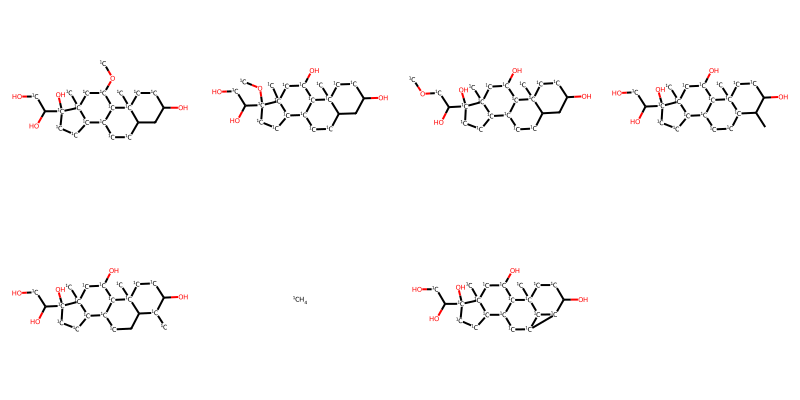

In [11]:
# Prepare the lists for drawing
smiles_list = list(predicted_products2.keys())

# Draw the molecules
img = draw_molecules(smiles_list)
img